### 画像フィルタリング
- 順番は以下のように行う
1. フィルタリングを行うカーネルを作成する
2. ```フィルタリング後画像変数 = cv2.filter2D(画像変数, -1, カーネル変数)```でフィルタリングを行う

### 平均値フィルタ
- サイズ3×3の平均値フィルタで使用するカーネルは各値が1/9である（9 = 3×3）
- サイズ5×5の平均値フィルタで使用するカーネルは各値が1/25である（25 = 5×5）
- サンプル
```python
# 3×3の平均値フィルタに使用するカーネル
kernel_33 = np.ones((3,3), np.float32)/9
# 5×5の平均値フィルタに使用するカーネル
kernel_55 = np.ones((5,5), np.float32)/25
```

- 平均値フィルタを適用すると基本的にぼやける

In [2]:
# カーネルの表示
import numpy as np
kernel_33 = np.ones((3,3), np.float32)/9
kernel_55 = np.ones((5,5), np.float32)/25
print(kernel_33)
print(kernel_55)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


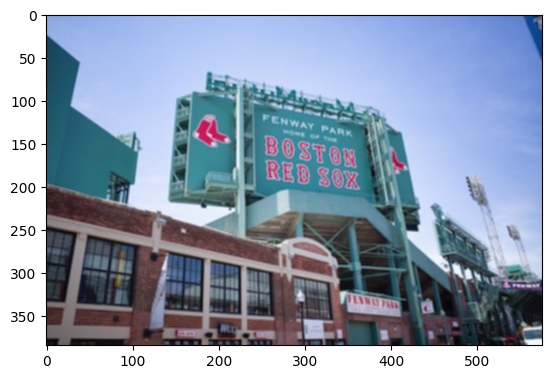

In [6]:
# 平均値フィルタを行う
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('boston.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルの作成
kernel = np.ones((3,3), np.float32)/9

# 平均値フィルタ
after_image = cv2.filter2D(image, -1, kernel)

plt.imshow(after_image)
plt.show()

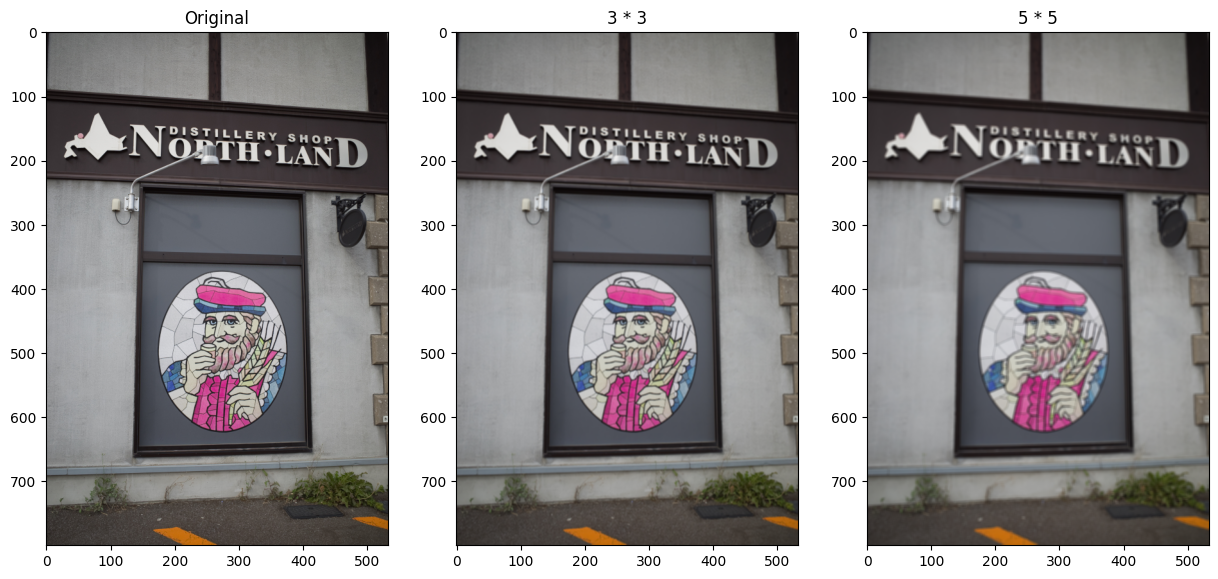

In [15]:
# カーネルの大きさによる違い
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15)) # 横10インチ，縦10インチ

plt.subplot(131)
plt.title('Original')
plt.imshow(image)

plt.subplot(132)
# カーネルの作成
kernel = np.ones((3,3), np.float32)/9
# 平均値フィルタ
after_image = cv2.filter2D(image, -1, kernel)
plt.title('3 * 3')
plt.imshow(after_image)

plt.subplot(133)
# カーネルの作成
kernel = np.ones((5,5), np.float32)/25
# 平均値フィルタ
after_image = cv2.filter2D(image, -1, kernel)
plt.title('5 * 5')
plt.imshow(after_image)

plt.show()

### 平均化フィルタ
- ```cv2.blur()```を使用することで，平均化フィルタを適用できる
```
平均化フィルタ画像変数 = cv2.blur(入力画像変数, (カーネルの大きさ, カーネルの大きさ))
```

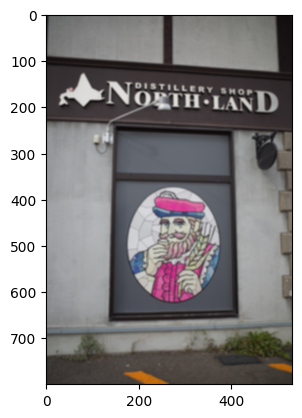

In [15]:
# 平均化フィルタを適用する
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルの作成

# 平均化フィルタ（5×5）
after_image = cv2.blur(image, (5, 5))

plt.imshow(after_image)
plt.show()

### ガウシアンフィルタ
- ```cv2.GaussianBlur()```を使用することで，加重平均フィルタの1つであるガウシアンフィルタを適用できる
```
ガウシアンフィルタ画像変数 = cv2.GaussianBlur(入力画像変数, (カーネルの大きさ, カーネルの大きさ), 0)
```

In [ ]:
# ガウシアンフィルタを適用する
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('fig/test.png')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルの作成

# ガウシアンフィルタ（5×5）
after_image = cv2.GaussianBlur(image, (5, 5), 0)
plt.grid(False)
plt.imshow(after_image)
plt.show()

### バイラテラルフィルタ
- ```cv2.bilateralFilter()```を使用することで，加重平均フィルタの1つであるバイラテラルフィルタを適用できる
```
バイラテラルフィルタ画像変数 = cv2.bilateralFilter(画像変数, カーネルの大きさ, 色の差による重みの補正値, 注目画素からの距離による重みの補正値)
```

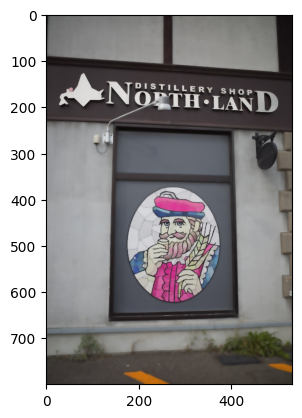

In [65]:
# バイラテラルフィルタを適用する
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルの作成

# バイラテラルフィルタ（9×9）
after_image = cv2.bilateralFilter(image, 9, 100, 100)

plt.imshow(after_image)
plt.show()

### 中央値フィルタ
- ```cv2.medianBlur()```を使用することで，中央値フィルタを適用できる
- 中央値フィルタはごま塩ノイズを消すことができる
```
中央値フィルタ画像変数 = cv2.medianBlur(画像変数, カーネルの大きさ)
```

- 適用画像（nikka_noise.jpeg）

<img src="fig/nikka_noise.jpeg" width="50%">


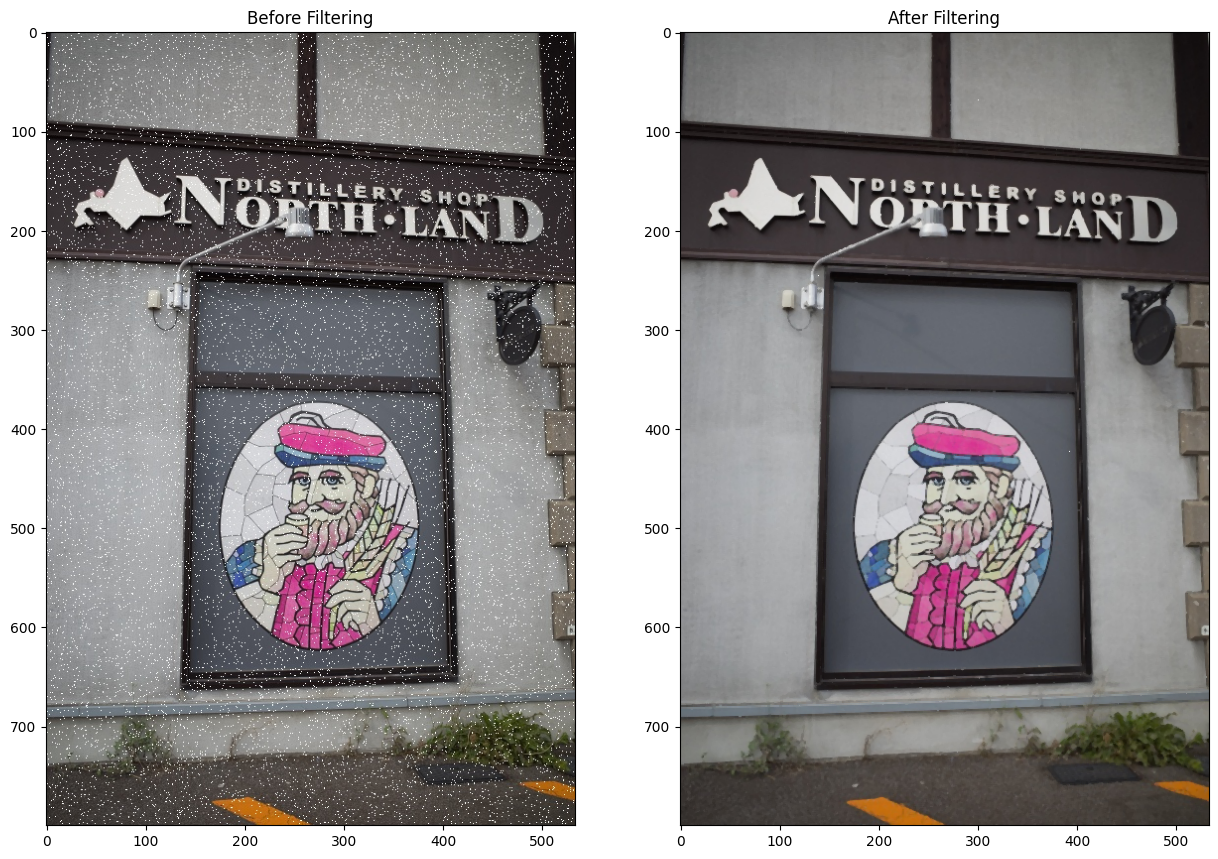

In [29]:
# 中央値フィルタを適用する
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('nikka_noise.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 中央値フィルタ（3×3）
after_image = cv2.medianBlur(image, 3)

plt.figure(figsize=(15, 15)) # 横15インチ，縦15インチ
plt.subplot(121)
plt.title('Before Filtering')
plt.imshow(image)

plt.subplot(122)
plt.title('After Filtering')
plt.imshow(after_image)
plt.show()

### 微分オペレータ
- OpenCVでは単純な微分オペレータは用意されていないため，カーネルを自作する

```python
# 例
kernel = np.array([[0,0,0],
                   [0,-1,1],
                   [0,0,0]])
フィルタリング後画像変数 = cv2.filter2D(画像変数, -1, kernel)
```

- 適用画像（window.jpg）

<img src="fig/window.jpg" width="75%">


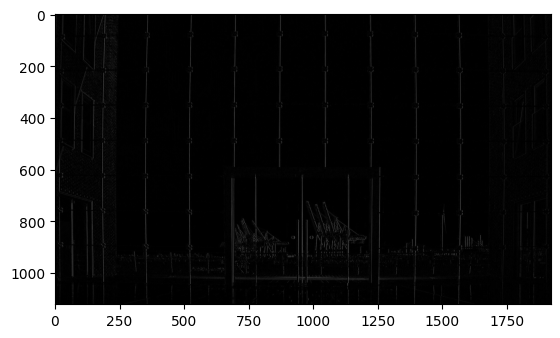

In [12]:
# 微分オペレータを行う
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('window.jpg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 横方向微分オペレータ
kernel = np.array([[0,0,0],
                   [0,-1,1],
                   [0,0,0]])

# 微分オペレータ（横）実行
after_image = cv2.filter2D(image, -1, kernel)

plt.imshow(after_image)
plt.gray()
plt.show()

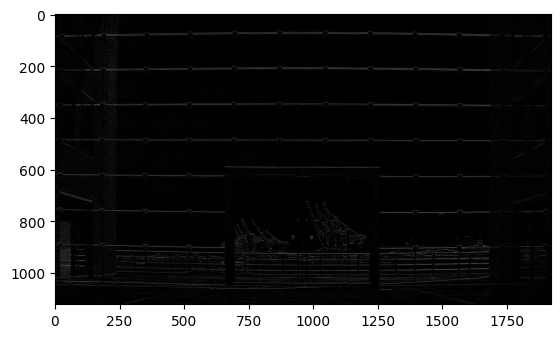

In [13]:
# 微分オペレータを行う
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('window.jpg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 縦方向微分オペレータ
kernel = np.array([[0,1,0],
                   [0,-1,0],
                   [0,0,0]])

# 微分オペレータ（縦）実行
after_image = cv2.filter2D(image, -1, kernel)

plt.imshow(after_image)
plt.gray()
plt.show()

### ソーベルオペレータ
- ```cv2.Sobel()```を使用することで，ソーベルフィルタを適用できる

```python
# 横方向ソーベルオペレータ
ソーベルオペレータ変数 = cv2.Sobel(画像変数, cv2.CV_8U, 1, 0, カーネルの大きさ)

# 縦方向ソーベルオペレータ
ソーベルオペレータ変数 = cv2.Sobel(画像変数, cv2.CV_8U, 0, 1, カーネルの大きさ)
```



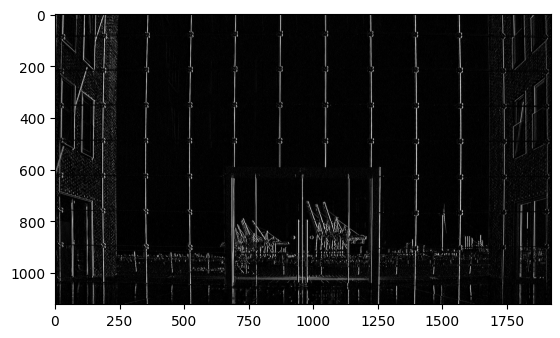

In [20]:
# ソーベルオペレータを行う
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('window.jpg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 横方向ソーベルオペレータ実行(3×3)
after_image = cv2.Sobel(image, cv2.CV_8U, 1, 0, 3)

plt.imshow(after_image)
plt.gray()
plt.show()

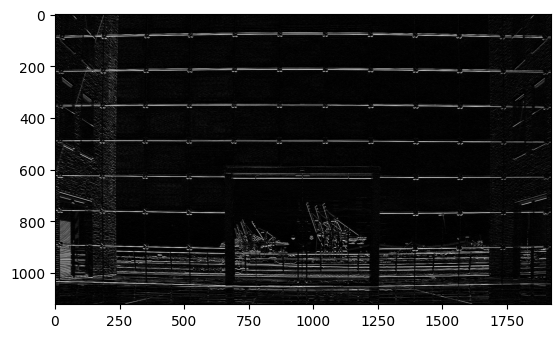

In [21]:
# ソーベルオペレータを行う
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('window.jpg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 縦方向ソーベルオペレータ実行(3×3)
after_image = cv2.Sobel(image, cv2.CV_8U, 0, 1, 3)

plt.imshow(after_image)
plt.gray()
plt.show()

### ラプラシアンオペレータ
- ```cv2.Laplacian()```を使用することで，ソーベルフィルタを適用できる

```python
ラプラシアンオペレータ変数 = cv2.Laplacian(画像変数, cv2.CV_8U, 1)
```


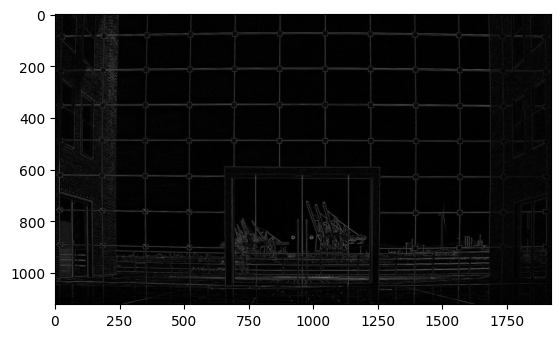

In [29]:
# ラプラシアンオペレータを行う
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('window.jpg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ラプラシアンオペレータを行う
after_image = cv2.Laplacian(image, cv2.CV_8U, 1)

plt.imshow(after_image)
plt.gray()
plt.show()

### Cannyのエッジ検出
- ```cv2.Canny()```を使用することで，Cannyのエッジ検出を使用できる

```python
# しきいA < しきいBにする
Cannyのエッジ検出変数 = cv2.Canny(画像変数, しきいA, しきいB)
```

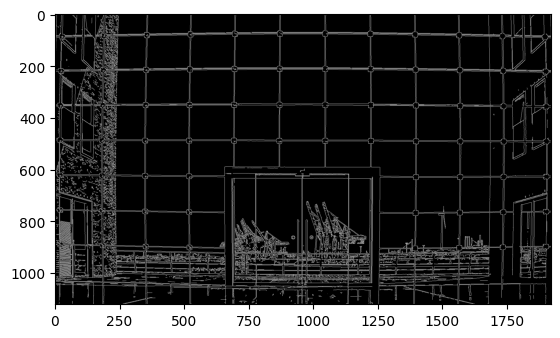

In [37]:
# Cannyのエッジ検出を行う
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('window.jpg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cannyのエッジ検出を行う
after_image = cv2.Canny(image, 100, 180)

plt.imshow(after_image)
plt.gray()
plt.show()

### 鮮鋭化フィルタ処理
- OpenCVでは単純な鮮鋭化フィルタは用意されていないため，カーネルを自作する

```python
# 例
k = 1 # ここを変える（k は1以上の整数）
kernel = np.array([[-k, -k, -k],
                   [-k, 1 + 8 * k , -k],
                   [-k, -k, -k]])
フィルタリング後画像変数 = cv2.filter2D(画像変数, -1, kernel)
```

- 適用画像（church.jpg）

<img src="fig/church.jpg" width="75%">


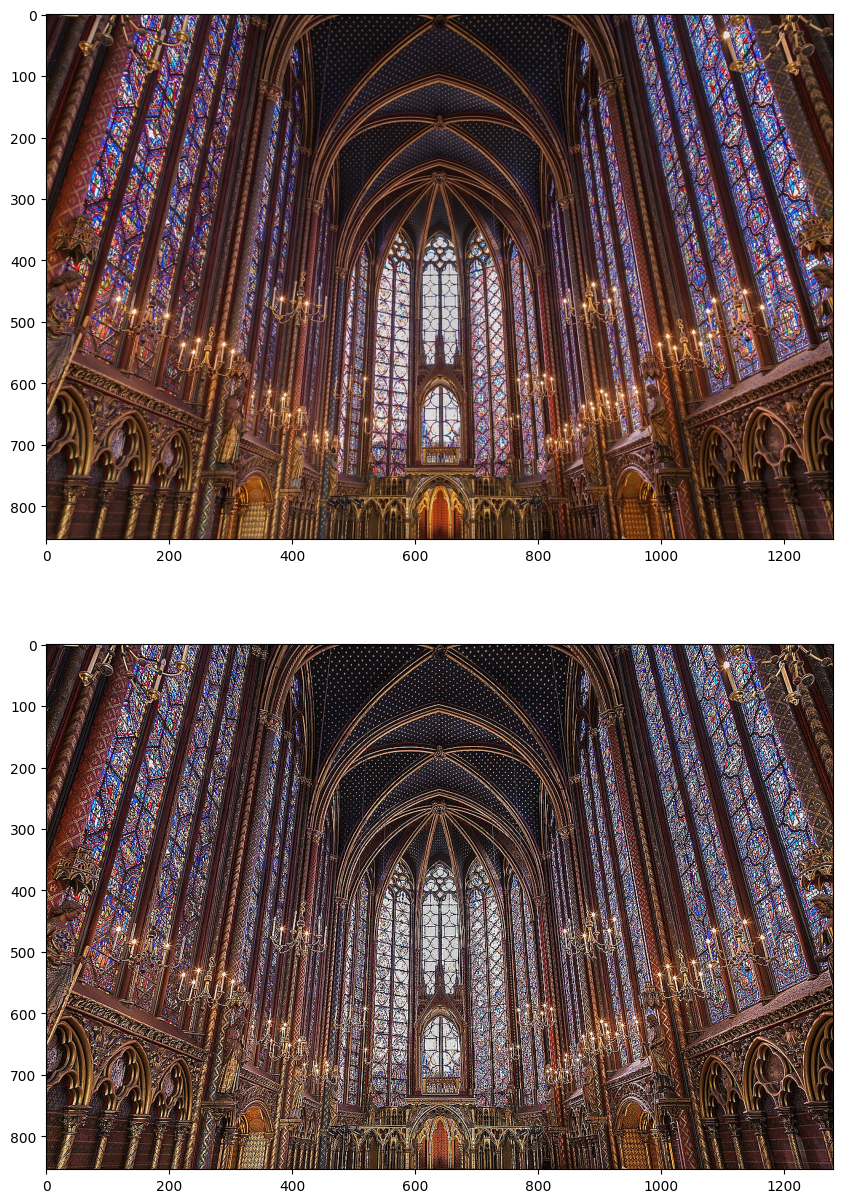

In [1]:
# 鮮鋭化フィルタ処理を行う
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('church.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

plt.figure(figsize=(15, 15)) # 横15インチ，縦15インチ
plt.subplot(211)
plt.imshow(image)

k = 1 # ここを変える（k は1以上の整数）
kernel = np.array([[0, -k, 0],
                   [-k, 1 + 4 * k, -k],
                   [0, -k, 0]])

plt.subplot(212)
# 鮮鋭化フィルタ実行
after_image = cv2.filter2D(image, -1, kernel)

plt.imshow(after_image)
plt.show()

### 演習問題
1. 以下に示す画像に対して，『サイズ7×7の平均値フィルタ』，『ガウシアンフィルタ(7×7)』，『ラプラシアンオペレータ』『Cannyのエッジ検出』を適用した結果を1列でプロットしなさい．

- 適用画像（church.jpg）

<img src="fig/church.jpg" width="50%">

2. 以下に示す画像に対して，ノイズを除去しなさい．（除去前と除去後を1列に並べてプロットすること）

- 適用画像（boston2_noise.jpeg）

<img src="fig/boston2_noise.jpeg" width="50%">

3. 以下に示す画像に対して，鮮鋭化フィルタ処理を行いなさい．（処理前と処理後を1列に並べてプロットすること）

- 適用画像（uni.jpeg）

<img src="fig/uni.jpeg" width="50%">